In [411]:
import pandas as pd
import networkx as nx
from IPython.display import HTML
import matplotlib.pyplot as plt

In [413]:
datos_nodos = pd.read_csv('metrocdmx.csv')

In [415]:
datos_nodos.describe()

,Peso,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,347.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5.489914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.885440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


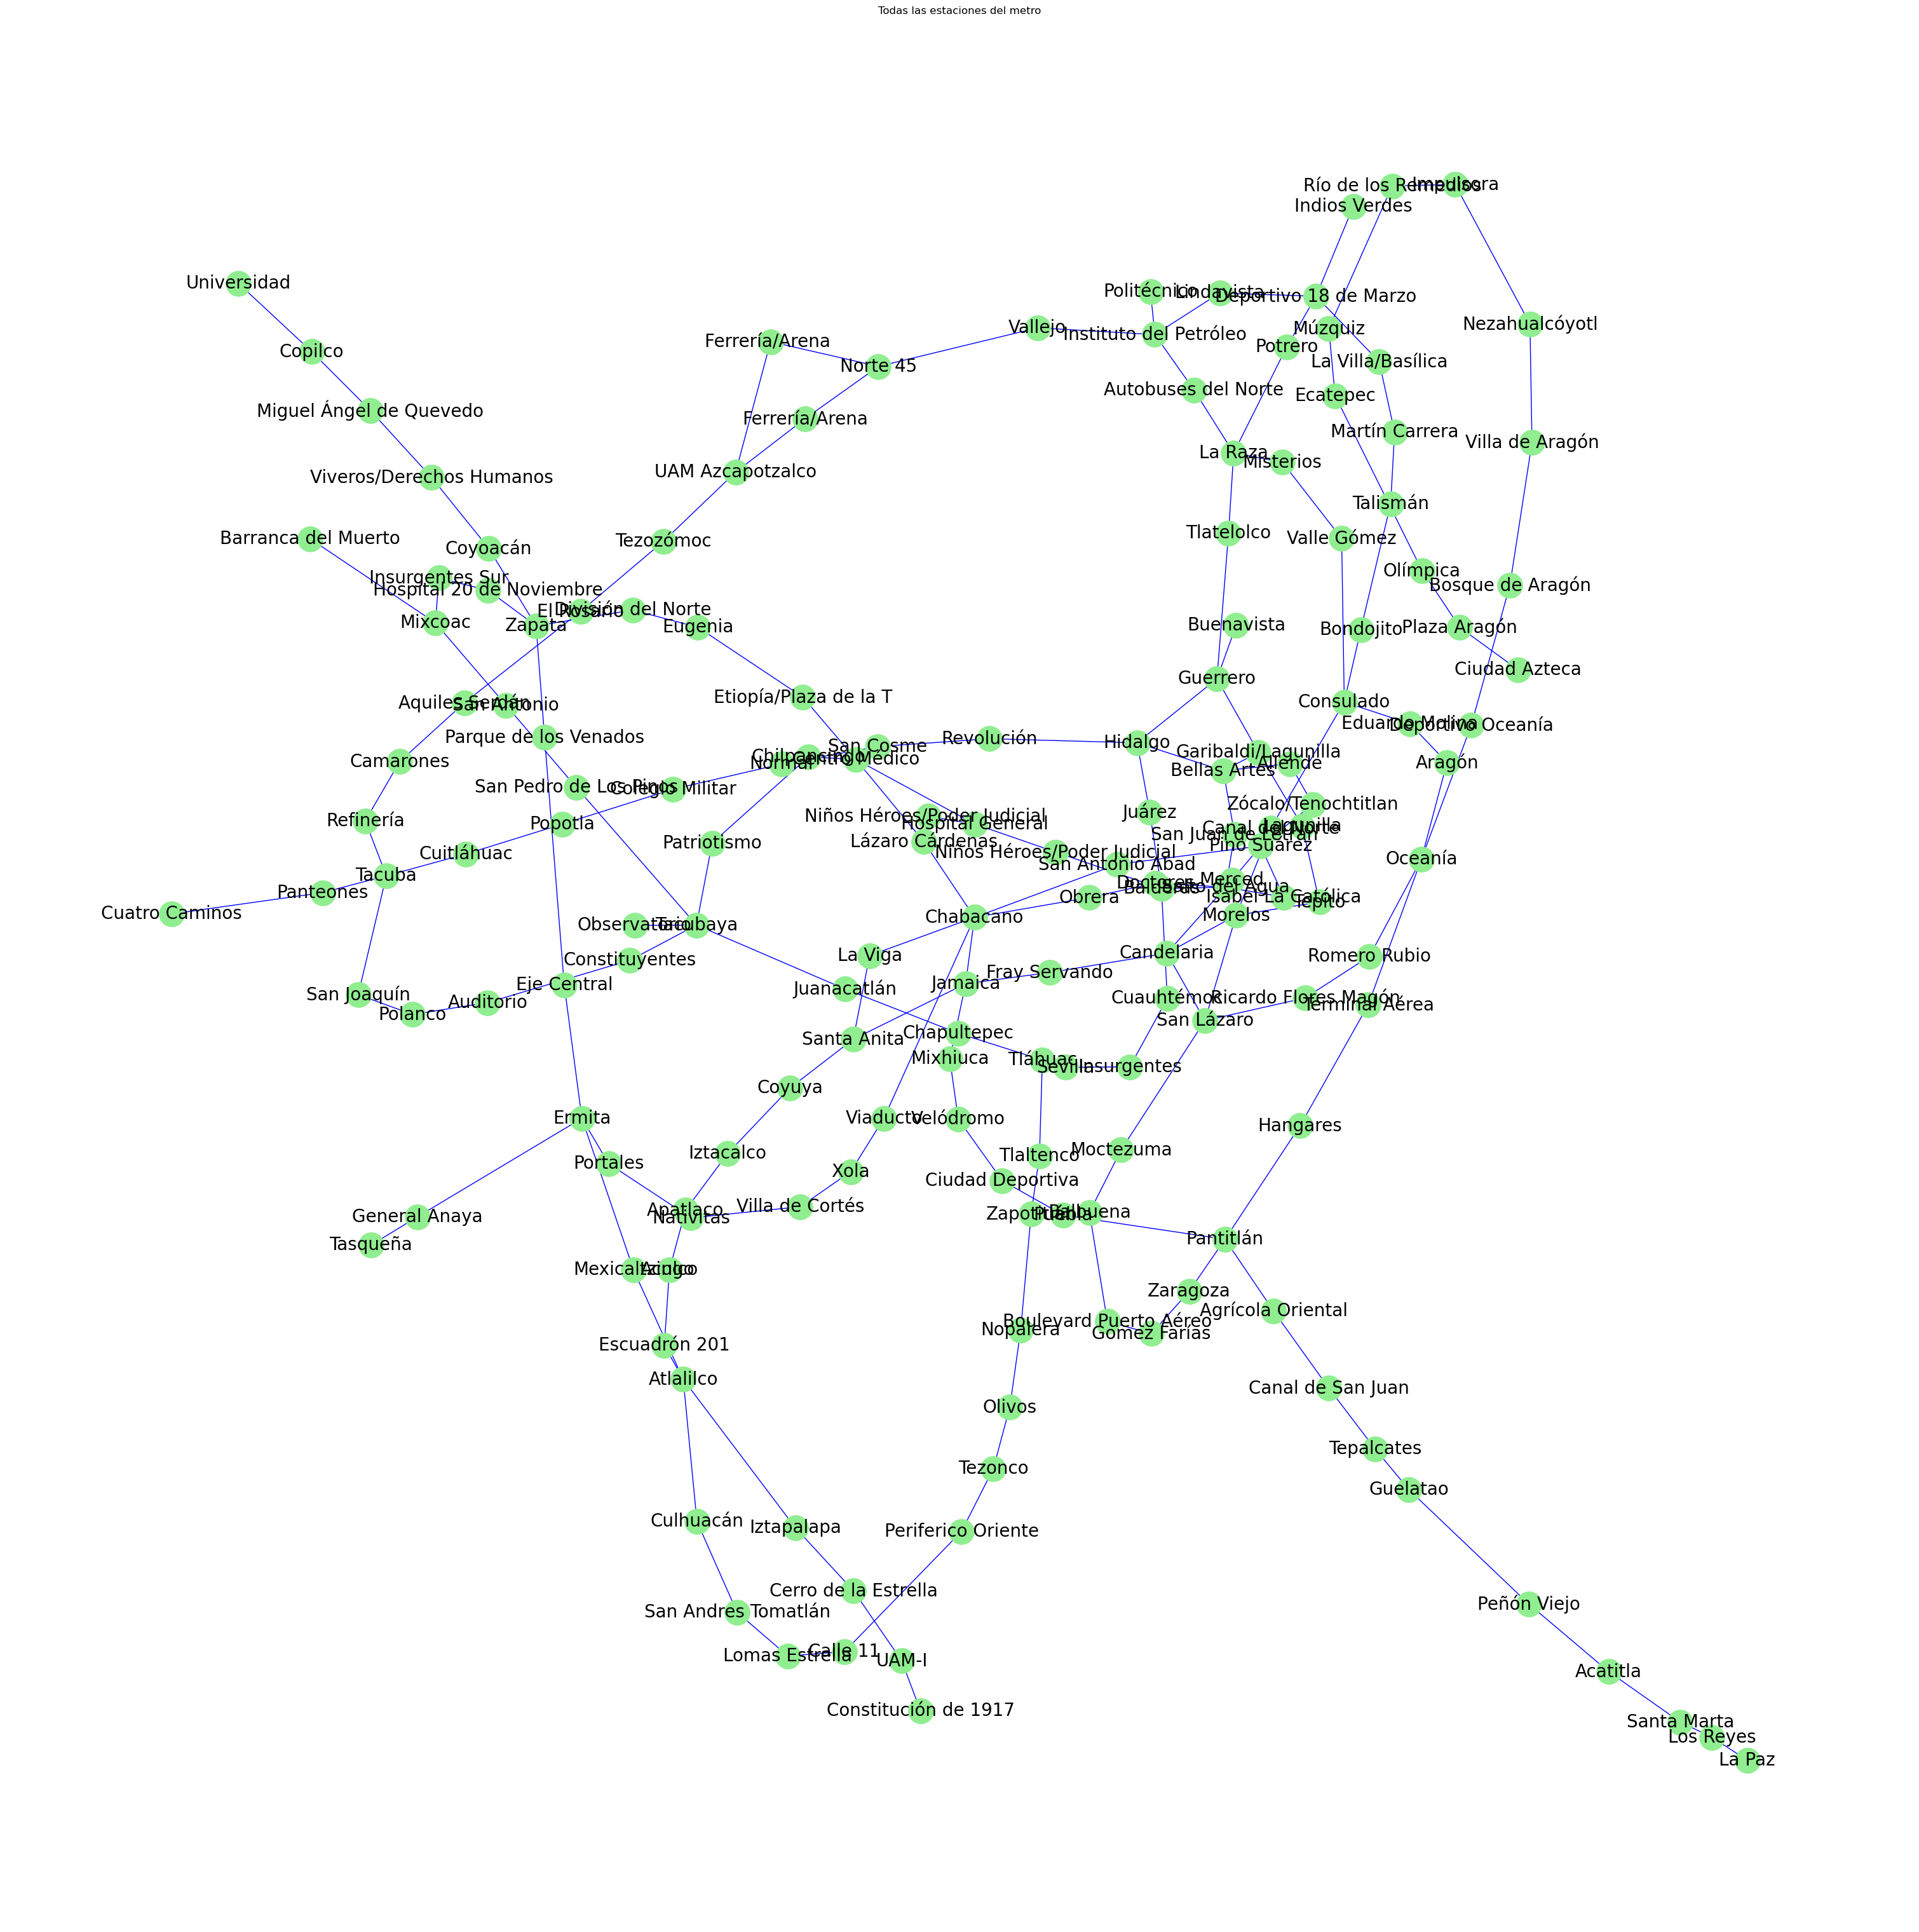

In [481]:
plt.figure(figsize=(30, 30))
nx.draw(G,
         node_color='lightgreen',
         edge_color='blue',
         font_size=20,
         width=1,
         with_labels=True,
         node_size=800)
plt.title("Todas las estaciones del metro")
plt.show()


In [418]:
G = nx.Graph()

In [420]:
for _, row in datos_nodos.iterrows():
    G.add_edge(row['Origen'],row['Destino'],weight=row['Peso'])

In [422]:
def ruta_mas_corta(origen, destino):
    ruta = nx.shortest_path(G, source=origen, target=destino, weight='weight')
    peso_total = sum(G[origen][destino]['weight'] for origen, destino in zip(ruta[:-1],ruta[1:]))
    return ruta, peso_total



In [425]:
origen = input("Introduce la ruta de origen:")
destino = input("Introduce la ruta de destino:")

Introduce la ruta de origen: Universidad
Introduce la ruta de destino: Martín Carrera


In [427]:
try:
    ruta, peso = ruta_mas_corta(origen, destino)
    print("=" * 130)
    print(f"{'Origen =':} {origen:}  ")
    print("=" * 130)
    print(f"{'Destino =':} {destino:}  ")
    print("=" * 130)
    print(f"{'Ruta =':} {ruta:}  ")
    print("=" * 130)
    print(f"{'Peso Total':} {peso:}")
    print("=" * 130)


except nx.NetworkXNoPath:
    print(f"No existe una ruta entre {origen} y {destino}.")
except nx.NodeNotFound:
    print(f"Una de las estaciones ingresadas no existe en los datos.")

Origen = Universidad  
Destino = Martín Carrera  
Ruta = ['Universidad', 'Copilco', 'Miguel Ángel de Quevedo', 'Viveros/Derechos Humanos', 'Coyoacán', 'Zapata', 'División del Norte', 'Eugenia', 'Etiopía/Plaza de la T', 'Centro Médico', 'Hospital General', 'Niños Héroes/Poder Judicial', 'Balderas', 'Juárez', 'Hidalgo', 'Guerrero', 'Tlatelolco', 'La Raza', 'Potrero', 'Deportivo 18 de Marzo', 'La Villa/Basílica', 'Martín Carrera']  
Peso Total 116


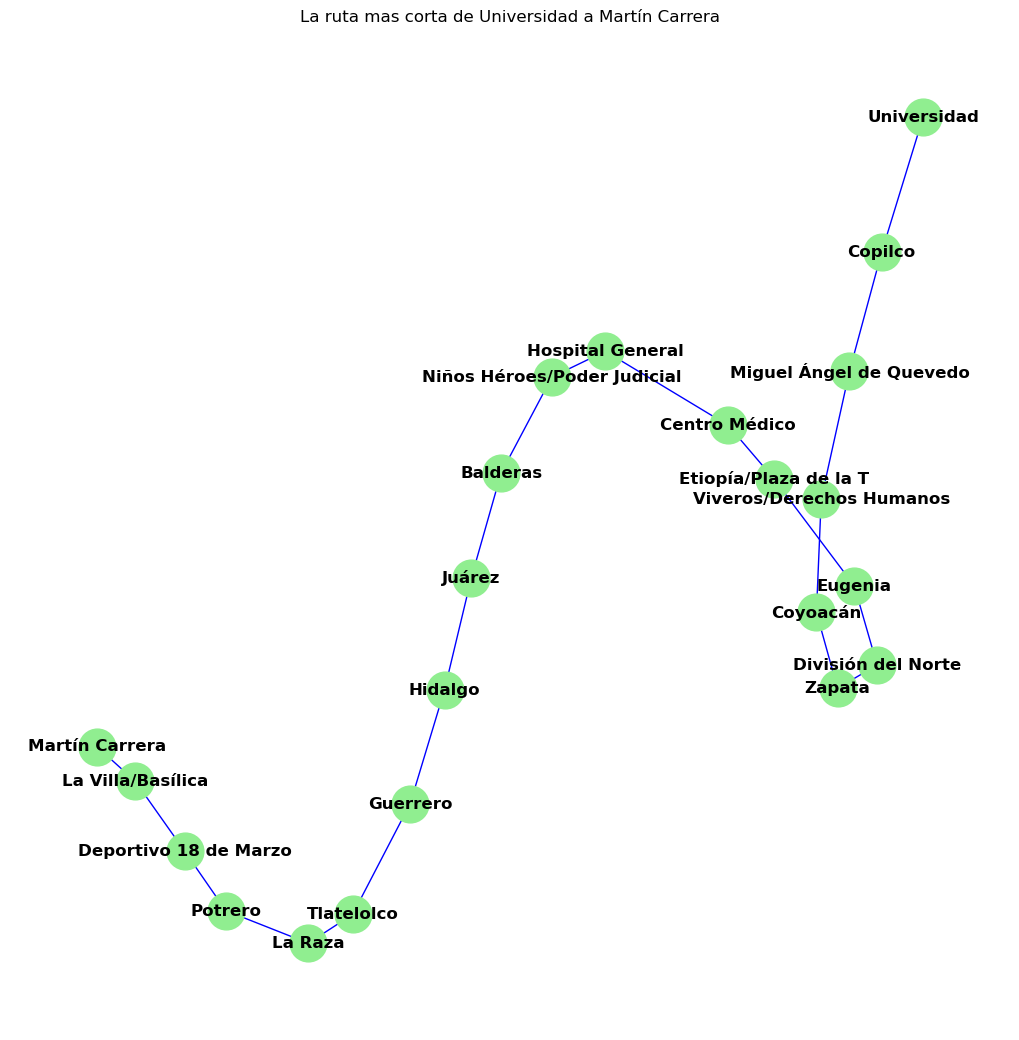

In [430]:
subgrafo = G.subgraph(ruta)
plt.figure(figsize=(10,10))
pos= nx.spring_layout(subgrafo)
nx.draw(subgrafo, pos, with_labels=True, node_color='lightgreen', font_weight='bold', node_size=700, edge_color='blue')
plt.title(f"La ruta mas corta de {origen} a {destino}")
plt.show()

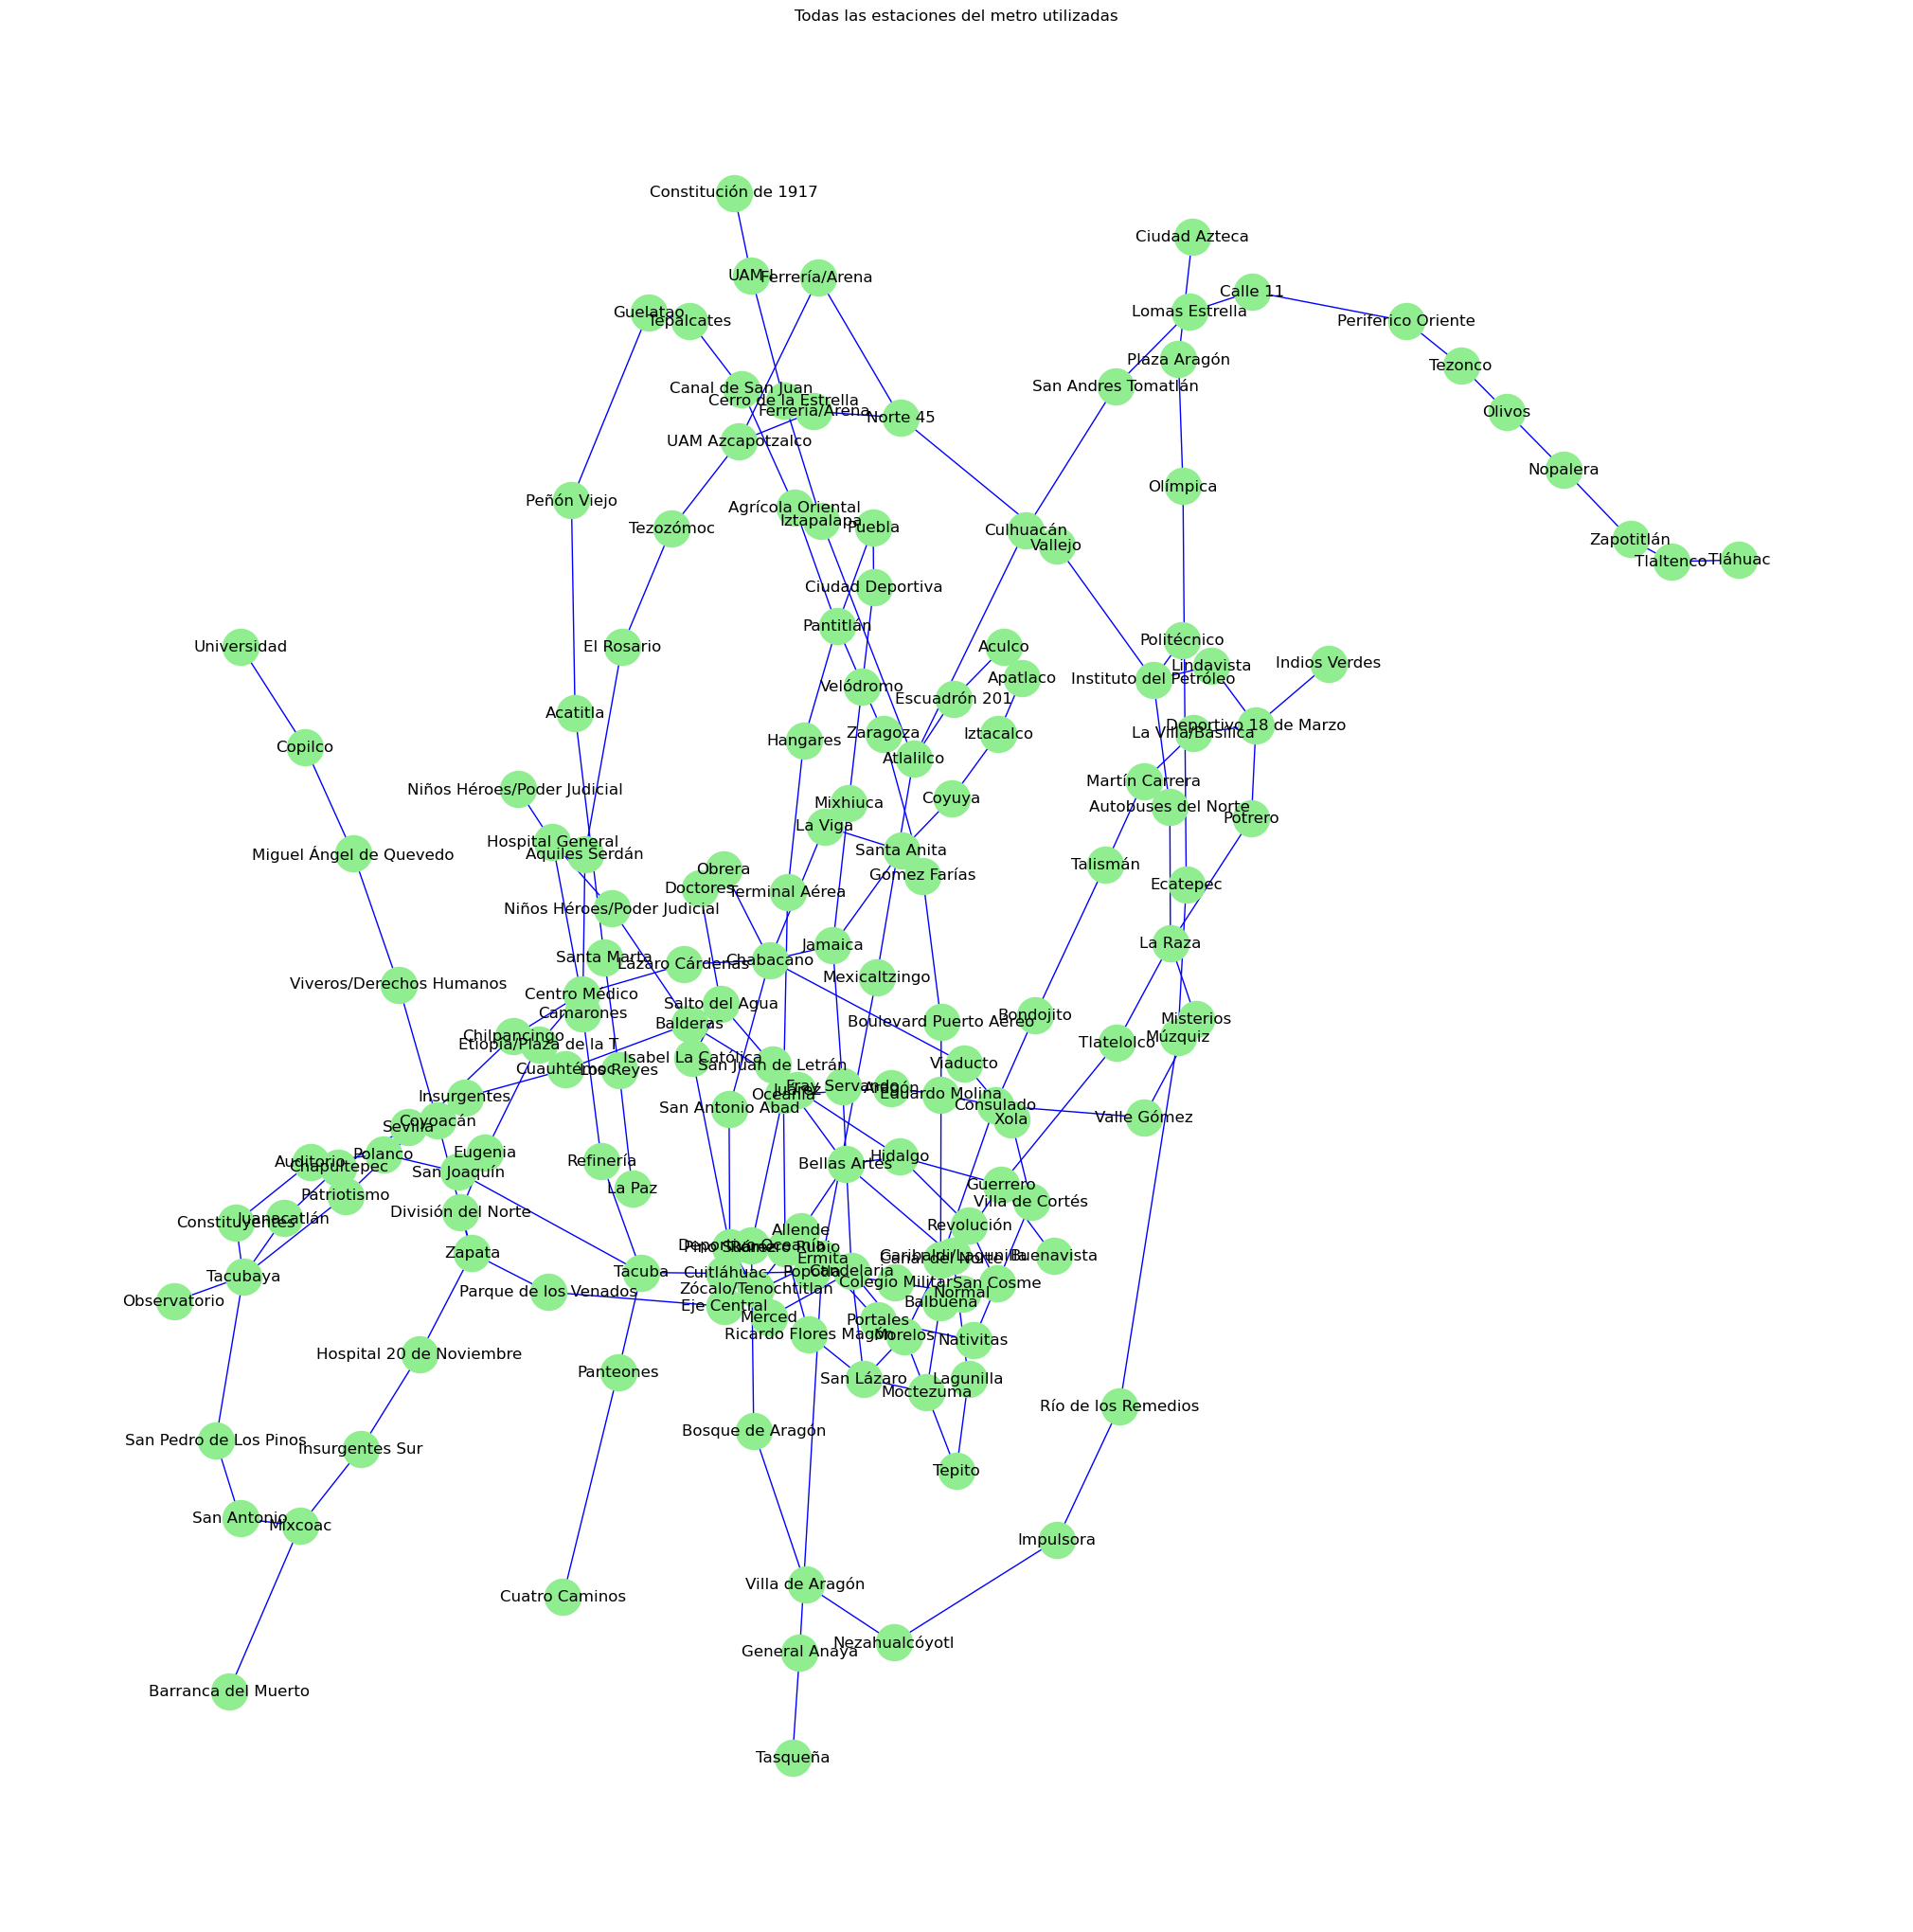

In [470]:
plt.figure(figsize=(20, 20))  
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=750, edge_color='blue')  
plt.title("Todas las estaciones del metro utilizadas")
plt.show()